## https://journals.ametsoc.org/view/journals/clim/30/15/jcli-d-16-0875.1.xml#s2c

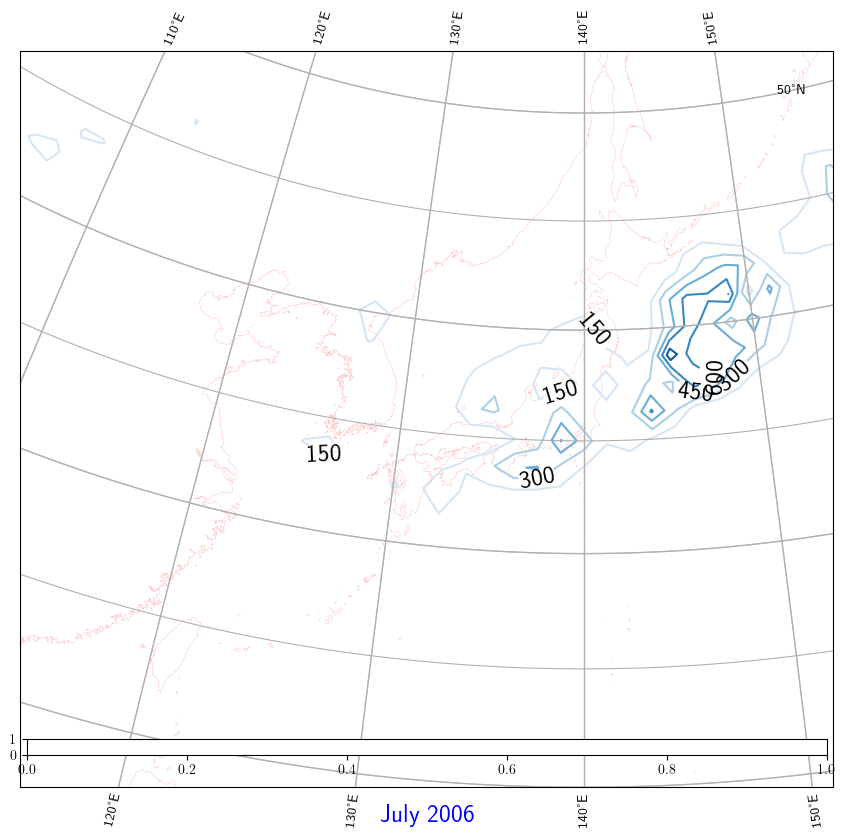

In [6]:
## JRA55 netcdf形式データの読み込み処理
import datetime
from dateutil import tz
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import metpy.calc as mpcalc
import metpy.constants as m_const
from metpy.units import units
import numpy as np
import xarray as xr
import scipy.ndimage as ndimage
import scipy.constants as s_const
import sys
import math
import pandas
# import sympy
# from mpl_toolkits.basemap import Basemap


i_year =2006
i_month = 7
i_day = 19
i_hourZ = 0
i_pre=300

lat_cut=slice(80.0,-20.0)
lon_cut=slice(70.0,190.0)
level_cut=slice(300.0,1e+3)

# データ格納先フォルダー名
DataFd=""


i_area = [115, 151, 20, 50]  # 日本付近

dlon,dlat=10,10   # 10度ごとに
                                                               
time_targ=(i_day - 1) * 4 + i_hourZ // 6
                                     
yyyymm='{:04d}{:02d}'.format(i_year,i_month)





UgrdFn ='{}UGRD_{}.nc'.format(DataFd,yyyymm)
VgrdFn ='{}VGRD_{}.nc'.format(DataFd,yyyymm)
HgtFn ='{}HGT_{}.nc'.format(DataFd,yyyymm)
Reld ='{}RELD_{}.nc'.format(DataFd,yyyymm)



## Wind U                                                                  
ds = xr.open_dataset(UgrdFn)
dataUgrd = ds.metpy.parse_cf('UGRD').squeeze()

for dim in dataUgrd.dims:
    size = dataUgrd.sizes[dim]

dataUgrd.attrs['units'] = 'm/s'
                                             
dataUgrd = dataUgrd.isel(time=time_targ)
dataUgrd = dataUgrd.sel(level=level_cut,
                        lat=lat_cut,
                        lon=lon_cut)
## Wind V                                                                  
ds = xr.open_dataset(VgrdFn)
dataVgrd = ds.metpy.parse_cf('VGRD').squeeze()
dataVgrd.attrs['units'] = 'm/s'
dataVgrd = dataVgrd.isel(time=time_targ)
dataVgrd = dataVgrd.sel(level=level_cut,lat=lat_cut, lon=lon_cut)
## 高度                                                                    
ds = xr.open_dataset(HgtFn)
dataHgt = ds.metpy.parse_cf('HGT').squeeze()
dataHgt.attrs['units'] = 'meter'
dataHgt = dataHgt.isel(time=time_targ)
dataHgt = dataHgt.sel(lat=lat_cut,lon=lon_cut)
## 比湿                                                                    
ds = xr.open_dataset(Reld)
dataReld = ds.metpy.parse_cf('RELD').squeeze()
dataReld = dataReld.isel(time=time_targ)
dataReld = dataReld.sel(lat=lat_cut, lon=lon_cut)

### 計算
# 非地衡風 m/s => knot                                                     
#uag, vag = mpcalc.ageostrophic_wind(dataHgt, dataUgrd, dataVgrd)

dataRU = dataReld * dataUgrd
dataRV = dataReld * dataVgrd

dataRU2 = np.sum(dataRU, axis=0)
dataRV2 = np.sum(dataRV, axis=0)
dataRUg = dataRU2/9.8
dataRVg = dataRV2/9.8

IVT = np.sqrt(dataRUg*dataRUg + dataRVg*dataRVg)*1000000
# print(IVT)

                                                                            
proj = ccrs.Stereographic(central_latitude=60, central_longitude=140)

latlon_proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,8))
                                                        
plt.rcParams["contour.negative_linestyle"] = 'solid'
                                                                               
plt.subplots_adjust(left=0, right=1, bottom=0.06, top=0.98)                  
                                                                                  
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(i_area, latlon_proj)

ax.coastlines(resolution='10m', color ='red', lw = 0.08) # 海岸線の解像度を上げる                                                    
ax.gridlines()
                                                                                                
xticks=np.arange(0,360.1,dlon)
yticks=np.arange(-90,90.1,dlat)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True , linewidth=1, alpha=0.8)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)                     
ax_reld = fig.add_axes([0.1, 0.1, 0.8, 0.02])

                                                               
# cn_IVT = ax.contour(IVT.lon, IVT.lat, IVT.values,colors='blue', linewidths=1.5,levels=5,transform=latlon_proj )


cn_IVT = ax.contour(IVT.lon, IVT.lat, IVT.values,cmap='Blues', linewidths=1.5,levels=5,transform=latlon_proj )
ax.clabel(cn_IVT, fontsize=18, inline=True, colors='k',inline_spacing=5, fmt='%i', rightside_up=True)
# fig.text(0.5,0.01," {0}hPa Hight, ISOTACH, Divergence, Ageostrophic wind".format(i_pre), color='blue', ha='center',va='bottom', size=18)
fig.text(0.5,0.01,"July 2006" , color='blue', ha='center',va='bottom', size=18)
plt.show()
# plt.savefig("JapanMap.png")

C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has bee

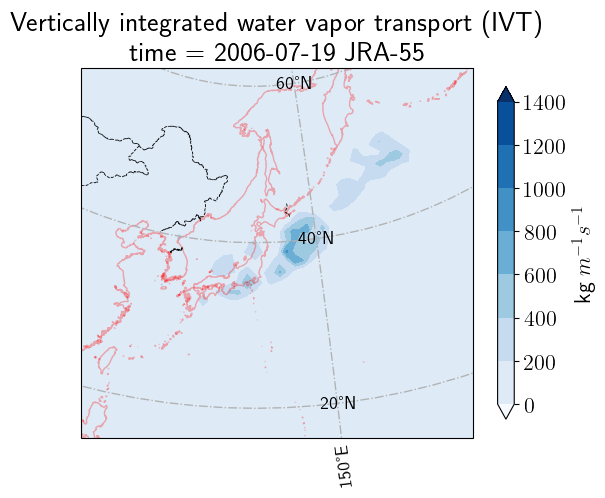

In [2]:
import cartopy  # Plotting libary
import cartopy.crs as ccrs  # Projections

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,LatitudeLocator)
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
import shapefile as shp 
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


plt.rc('text', usetex = True)
# fig = plt.figure(figsize=[15,6])

levels = np.arange(0,1600,200)
ax = plt.subplot(1, 1, 1, projection=ccrs.Stereographic(central_latitude=60, central_longitude=140))
cs = IVT.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Blues'),extend = 'both', levels=levels, add_colorbar=False) 
cbar = plt.colorbar(cs,shrink=0.9,orientation='vertical')
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('kg $m^{-1} s^{-1}$',size=16)

xl = ax.gridlines(draw_labels=True, alpha=0.95, linestyle="-.", linewidth =1); 
xl.xlabels_top = False 
xl.ylabels_right = False 

xl.ylocator = LatitudeLocator()
xl.xformatter = LongitudeFormatter()
xl.yformatter = LatitudeFormatter()
xl.xlocator = mticker.MaxNLocator(2)
xl.ylocator = mticker.MaxNLocator(3)
    
xl.xlabel_style = {'size': 13, 'color': 'k'}
xl.ylabel_style = {'color': 'k', 'size':13}

ax.set_extent([120,165,15,60])
ax.add_feature(cartopy.feature.LAND.with_scale('10m'), color='linen');
ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'), color = 'red', alpha = 0.3)
ax.add_feature(cartopy.feature.BORDERS.with_scale('10m'), linestyle='--', lw =0.6); 

plt.title("Vertically integrated water vapor transport (IVT) \n time = 2006-07-19 JRA-55 ", fontsize = 20)
# plt.text(120, 1, "contourf", fontsize = 20)
plt.savefig("IVT.pdf")
plt.show()

In [15]:
fileu = "UGRD_200607.nc" #要変更
filev = "VGRD_200607.nc" #要変更

# ファイルの読み込み
U = xr.open_dataset(fileu)
V = xr.open_dataset(filev)

p_cut = 500; time_cut = '2006-07'
Usub = U['UGRD'].sel(level=p_cut,time=time_cut).squeeze()
Vsub = V['VGRD'].sel(level=p_cut,time=time_cut).squeeze()

ws = np.sqrt(Usub**2+Vsub**2)

# Calculate wind direction in radians:

ws_direction = np.arctan2(Vsub,Usub)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:

ws_daily_avg = np.nanmean(ws, axis=0)

C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\ProgramData\Anaconda3\envs\test-env-cmip6\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


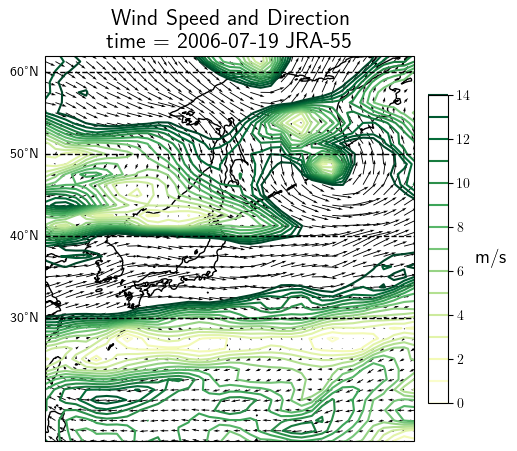

In [24]:
lons = U['lon']
lats = U['lat']
lon, lat = np.meshgrid(lons, lats)

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([120,165,15,60])
ax.coastlines(resolution="50m",linewidth=1)
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contour(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.YlGn)
plt.title('Wind Speed and Direction \n time = 2006-07-19 JRA-55', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, Usub[0,:,:], Vsub[0,:,:], scale=420, color='k')
plt.savefig("wind_YlGn.pdf")
plt.show()

<a list of 13 text.Text objects>

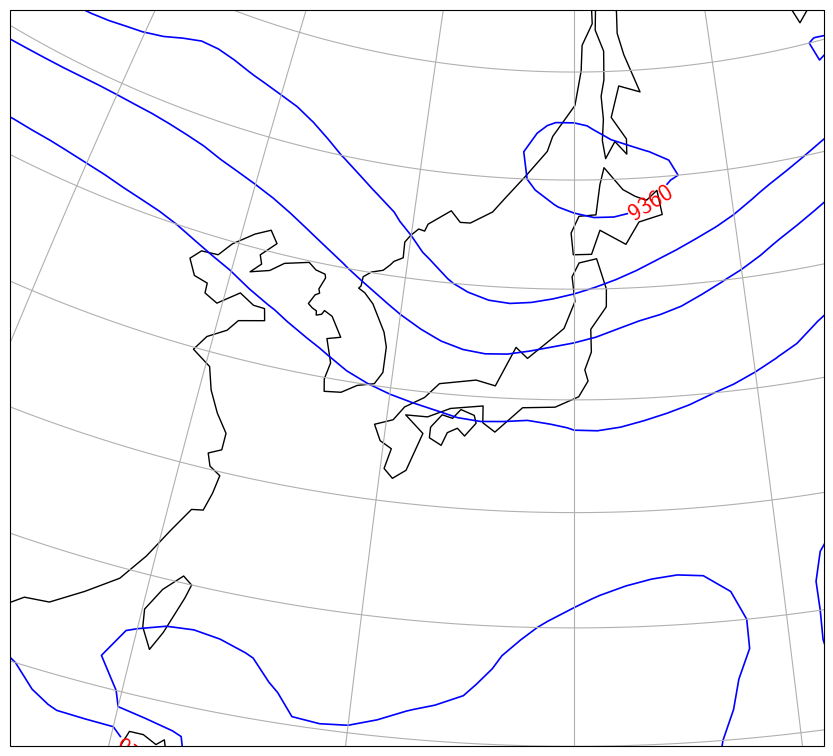

In [33]:
filep = "HGT_200607.nc" #要変更
# filev = "VGRD_200607.nc" #要変更

# ファイルの読み込み
# P = xr.open_dataset(filep)
ds = xr.open_dataset(filep)

dataHgt = ds.HGT.squeeze()
time_targ=(i_day - 1) * 4 + i_hourZ//6
dataHgt = dataHgt.isel(time=time_targ)
dataHgt = dataHgt.sel(level=i_pre,lat=lat_cut, lon=lon_cut)
dataHgt.attrs['units'] = 'meter'

if (i_pre < 400):
  dd_hgt = 120
elif (i_pre < 700):
  dd_hgt = 60
else:
  dd_hgt = 30

# ## 時刻文字列化                                  
# UTC = tz.gettz("UTC")
# dt1 = datetime.datetime.fromtimestamp(dataHgt.time.astype(datetime.datetime)*1e-9, tz=UTC)
# dt_str = (dt1.strftime("%HZ%d%b%Y")).upper()
# dt_str2 = dt1.strftime("%Y%m%d%H")
# print(dt_str)
# print(dt_str2)

proj = ccrs.Stereographic(central_latitude=60, central_longitude=140)
latlon_proj = ccrs.PlateCarree()
                                                                     
fig = plt.figure(figsize=(10,8))                                           
plt.rcParams["contour.negative_linestyle"] = 'solid'                                           
plt.subplots_adjust(left=0, right=1, bottom=0.06, top=0.98)                                                                                                  
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(i_area, latlon_proj)
ax.coastlines(resolution='110m',)                                           
ax.gridlines()

min_hgt = int(dataHgt.min() / dd_hgt) * dd_hgt
max_hgt = dataHgt.max() + dd_hgt
levels_hgt =np.arange(min_hgt, max_hgt, dd_hgt)
cn_hgt = ax.contour(dataHgt.lon, dataHgt.lat, dataHgt, colors='blue',linewidths=1.2, levels=levels_hgt, transform=latlon_proj )
ax.clabel(cn_hgt, levels_hgt, fontsize=18, inline=True, colors='red',inline_spacing=5, fmt='%i', rightside_up=True)